In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
cars_df=pd.read_excel(r"C:\Users\Useer\Downloads\automobile.xlsx")
print(cars_df)

                          name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394                  vw pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  origin  
0      3504          12.0  

In [165]:
data_cleaned=(cars_df.dropna())
print(data_cleaned)

                          name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394                  vw pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  origin  
0      3504          12.0  

In [166]:
print(data_cleaned.isnull().sum())

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [167]:
# Splitting the data into features and labels
X = data_cleaned[['displacement']]
y = data_cleaned['horsepower']

In [168]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
# Creating a Linear Regression model and training it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [170]:
# Making predictions
y_pred = model.predict(X_test)

In [171]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Predictions for Test Set:", y_pred)

Mean Squared Error: 257.26751391515944
Predictions for Test Set: [ 71.80677556  80.04337966  70.15945473  70.15945473  86.30319878
  72.13623972 171.96388148  72.13623972 114.30765274  62.58177896
 168.66923983  91.57462541 155.49067327  72.13623972  93.88087456
  77.07820218 105.41212031  75.76034553  80.04337966  80.37284383
 105.41212031  72.13623972  70.15945473 141.3237142   66.20588476
  72.46570388  79.7139155  114.30765274  72.13623972  80.04337966
 155.49067327 116.61390189 128.14514764  79.7139155  171.96388148
  70.15945473 139.67639338  72.3009718  139.67639338 158.78531491
 141.3237142   69.82999057  74.77195303  72.13623972 155.82013743
 185.14244804 122.54425684  70.15945473  86.30319878  69.82999057
 155.82013743  77.40766635  86.30319878  79.7139155  116.61390189
 125.17997016 126.49782681 116.61390189  74.44248887  77.40766635
 190.08441051 116.61390189  97.1755162   79.7139155   84.3264138
  78.39605884  86.30319878  69.82999057 125.83889849 181.51834224
  86.3031987

C:\Users\Useer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


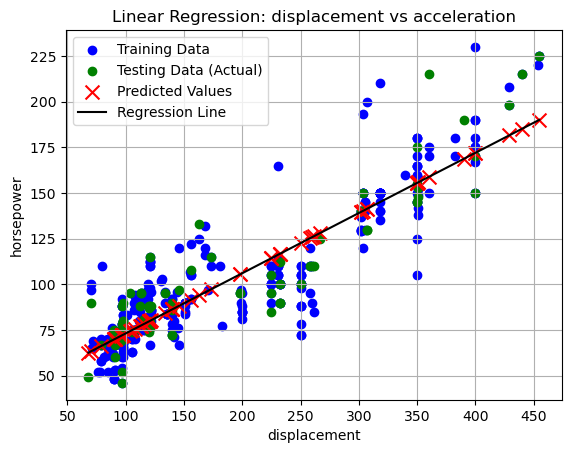

In [172]:
# Plotting actual values vs predicted values
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data (Actual)')
plt.scatter(X_test, y_pred, color='red', marker='x', s=100, label='Predicted Values')

# Plotting the regression line
# Creating points from the entire experience range for a better representation of the regression line
X_full = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_full)
plt.plot(X_full, y_line, color='black', label='Regression Line')

plt.xlabel('displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression: displacement vs acceleration')
plt.legend()
plt.grid(True)
plt.show()

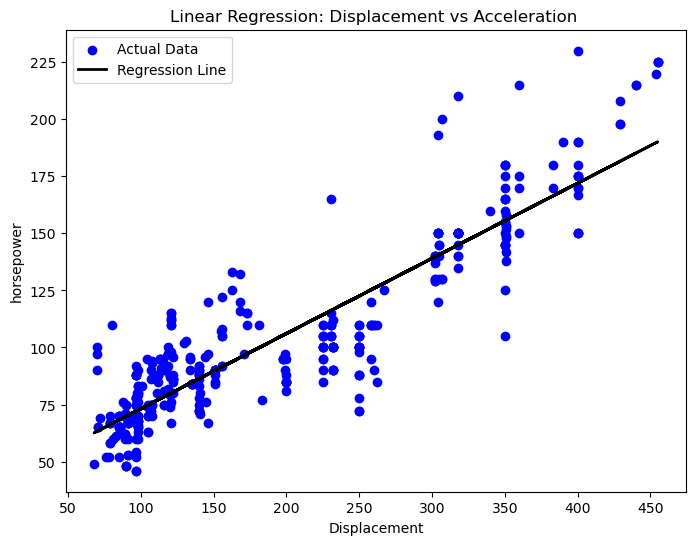

In [173]:

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Regression Line')
plt.xlabel('Displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression: Displacement vs Acceleration ')
plt.legend()
plt.show()

In [174]:
for  origin in ["usa","europe","japan"]:
    print(f"\n{origin} cars:\n", data_cleaned.groupby("origin").get_group(origin))


usa cars:
                           name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
392           chevrolet camaro  27.0          4         151.0        90.0   
393            ford mustang gl  27.0          4         140.0        86.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year origin  
0      3504     

In [175]:
X_usa = data_cleaned[data_cleaned['origin'] == 'usa'][['displacement']]
y_usa = data_cleaned[data_cleaned['origin'] == 'usa']['horsepower']

# Step 2: Split data into training and testing sets
X_train_usa, X_test_usa, y_train_usa, y_test_usa = train_test_split(X_usa, y_usa, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_usa, y_train_usa)

# Step 4: Make predictions
y_pred_usa = model.predict(X_test_usa)



In [176]:
mse = mean_squared_error(y_test_usa, y_pred_usa)
print("Mean Squared Error:", mse)
print("Predictions for Test Set:", y_pred_usa)

Mean Squared Error: 342.8203668168688
Predictions for Test Set: [110.41074091 193.92456634 119.52797076  85.24718652 155.99689016
 112.59887607 155.99689016 139.58587643 170.58445792  61.17769971
 174.23134986 110.41074091  79.41215941 112.59887607  72.84775392
 139.58587643 138.49180885 100.92882186 156.36157936 138.49180885
 174.23134986 140.31525482 156.36157936 156.36157936  83.42374055
  90.71752443 168.03163357 112.96356527  79.41215941 174.23134986
 122.44548431  66.64803762 119.52797076 139.22118724 159.6437821
  79.41215941 155.99689016  72.48306473 144.32683595  77.58871344
 100.56413267 156.36157936 110.41074091 101.29351106  64.09521326
 144.32683595  64.09521326 119.52797076 159.6437821 ]


C:\Users\Useer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


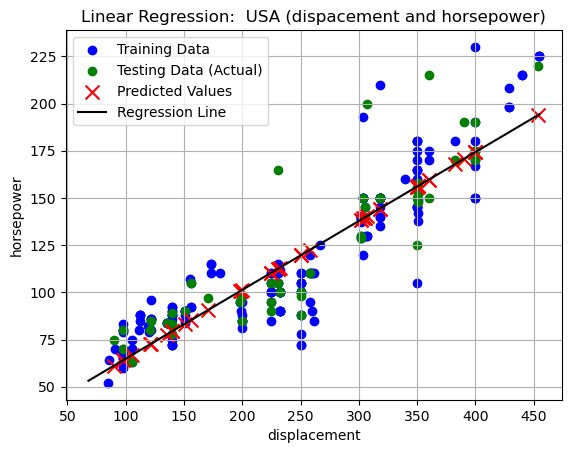

In [177]:
# Plotting actual values vs predicted values
plt.scatter(X_train_usa, y_train_usa, color='blue', label='Training Data')
plt.scatter(X_test_usa, y_test_usa, color='green', label='Testing Data (Actual)')
plt.scatter(X_test_usa, y_pred_usa, color='red', marker='x', s=100, label='Predicted Values')

# Plotting the regression line
# Creating points from the entire experience range for a better representation of the regression line
X_full_usa = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line_usa = model.predict(X_full_usa)
plt.plot(X_full_usa, y_line_usa, color='black', label='Regression Line')

plt.xlabel('displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression:  USA (dispacement and horsepower)')
plt.legend()
plt.grid(True)
plt.show()

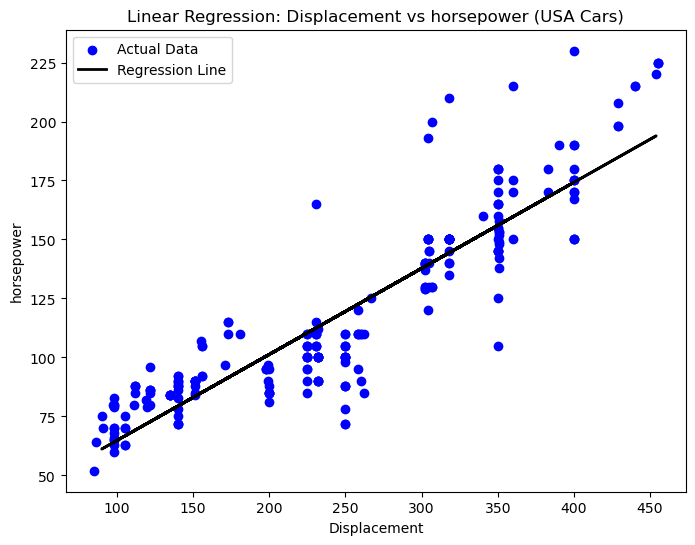

In [178]:
# Step 5: Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_usa, y_usa, color='blue', label='Actual Data')
plt.plot(X_test_usa, y_pred_usa, color='black', linewidth=2, label='Regression Line')
plt.xlabel('Displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression: Displacement vs horsepower (USA Cars)')
plt.legend()
plt.show()


In [179]:
X_europe = data_cleaned[data_cleaned['origin'] == 'europe'][['displacement']]
y_europe = data_cleaned[data_cleaned['origin'] == 'europe']['horsepower']

# Step 2: Split data into training and testing sets
X_train_europe, X_test_europe, y_train_europe, y_test_europe = train_test_split(X_europe, y_europe, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_europe, y_train_europe)

# Step 4: Make predictions
y_pred_europe = model.predict(X_test_europe)



In [180]:
mse = mean_squared_error(y_test_europe, y_pred_europe)
print("Mean Squared Error:", mse)
print("Predictions for Test Set:", y_pred_europe)

Mean Squared Error: 293.17065315317404
Predictions for Test Set: [ 91.76531212  62.31781709  87.09110656  75.87301322  72.60106932
  67.45944321  72.60106932  84.75400378  72.13364877  86.623686
  84.75400378  98.3091999  106.72276991  75.87301322]


C:\Users\Useer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


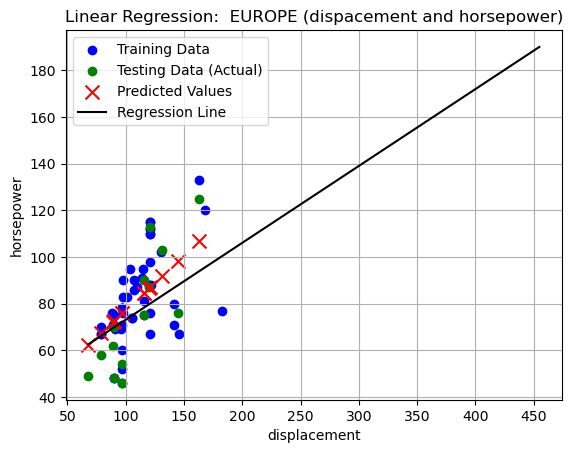

In [181]:
# Plotting actual values vs predicted values
plt.scatter(X_train_europe, y_train_europe, color='blue', label='Training Data')
plt.scatter(X_test_europe, y_test_europe, color='green', label='Testing Data (Actual)')
plt.scatter(X_test_europe, y_pred_europe, color='red', marker='x', s=100, label='Predicted Values')

# Plotting the regression line
# Creating points from the entire experience range for a better representation of the regression line
X_full_europe = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line_europe = model.predict(X_full)
plt.plot(X_full, y_line, color='black', label='Regression Line')

plt.xlabel('displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression:  EUROPE (dispacement and horsepower)')
plt.legend()
plt.grid(True)
plt.show()

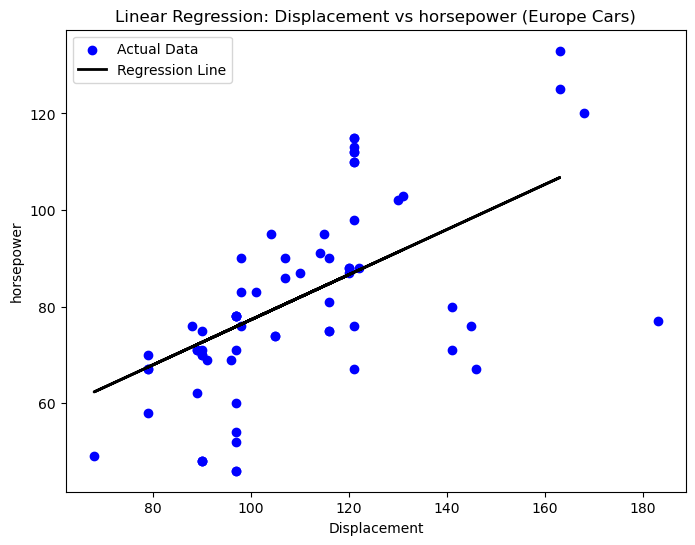

In [182]:
# Step 5: Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_europe, y_europe, color='blue', label='Actual Data')
plt.plot(X_test_europe, y_pred_europe, color='black', linewidth=2, label='Regression Line')
plt.xlabel('Displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression: Displacement vs horsepower (Europe Cars)')
plt.legend()
plt.show()

In [183]:
X_japan = data_cleaned[data_cleaned['origin'] == 'japan'][['displacement']]
y_japan = data_cleaned[data_cleaned['origin'] == 'japan']['horsepower']

# Step 2: Split data into training and testing sets
X_train_japan, X_test_japan, y_train_japan, y_test_japan = train_test_split(X_japan, y_japan, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_japan, y_train_japan)

# Step 4: Make predictions
y_pred_japan = model.predict(X_test_japan)

In [184]:
mse = mean_squared_error(y_test_japan, y_pred_japan)
print("Mean Squared Error:", mse)
print("Predictions for Test Set:", y_pred_europe)

Mean Squared Error: 70.13123276438614
Predictions for Test Set: [ 91.76531212  62.31781709  87.09110656  75.87301322  72.60106932
  67.45944321  72.60106932  84.75400378  72.13364877  86.623686
  84.75400378  98.3091999  106.72276991  75.87301322]


C:\Users\Useer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


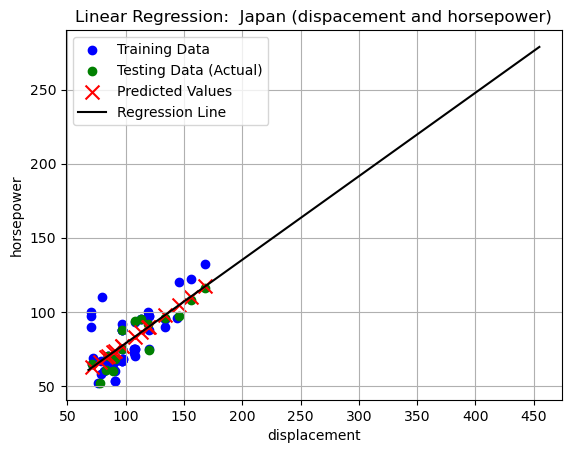

In [185]:
# Plotting actual values vs predicted values
plt.scatter(X_train_japan, y_train_japan, color='blue', label='Training Data')
plt.scatter(X_test_japan, y_test_japan, color='green', label='Testing Data (Actual)')
plt.scatter(X_test_japan, y_pred_japan, color='red', marker='x', s=100, label='Predicted Values')

# Plotting the regression line
# Creating points from the entire experience range for a better representation of the regression line
X_full_japan = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line_japan = model.predict(X_full_japan)
plt.plot(X_full_japan, y_line_japan, color='black', label='Regression Line')

plt.xlabel('displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression:  Japan (dispacement and horsepower)')
plt.legend()
plt.grid(True)
plt.show()

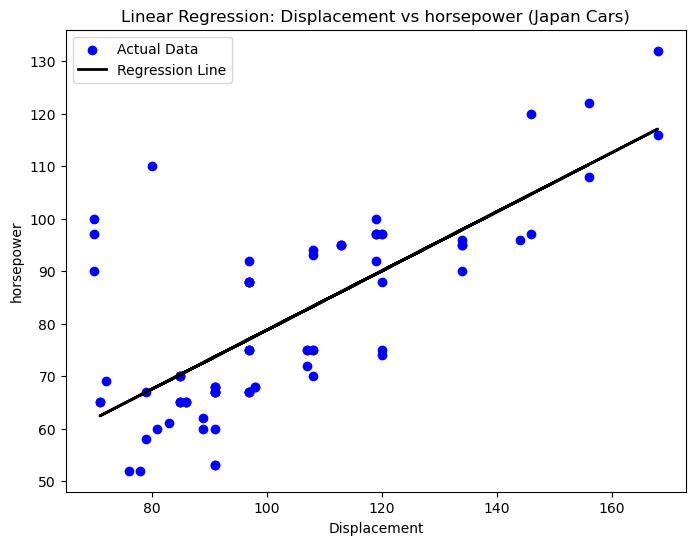

In [186]:
plt.figure(figsize=(8, 6))
plt.scatter(X_japan, y_japan, color='blue', label='Actual Data')
plt.plot(X_test_japan, y_pred_japan, color='black', linewidth=2, label='Regression Line')
plt.xlabel('Displacement')
plt.ylabel('horsepower')
plt.title('Linear Regression: Displacement vs horsepower (Japan Cars)')
plt.legend()
plt.show()